In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import PHOSAnalyzer

In [2]:
led_amp = 200

run_list = [2682, 2681, 2680, 2679, 2678, 2677, 2676, 2675, 2674, 2673, 2672, 2671, 2670, 2669, 2668]
hv_list =  [30,   100,  150,  200,  250,  300,  310,  320,  330,  340,  350,  360,  370,  380,  390]

phos_calib = PHOSAnalyzer.PHOSAnalyzer(module="M1-3", args_list=hv_list, run_list=run_list)
phos_calib.set_module("M1_3") # module config for this scan was changed to M1-3
phos_calib.set_base_path("/mnt/d/Projects/QML/PHOS256/data/")
phos_calib.load_pedestals("ped2666.root")
phos_calib.fill_df_from_TH1(do_ped_sub=True, use_lg=False)

df_pos = phos_calib.get_df_pos()
df_rms = phos_calib.get_df_rms()

df_pos

,30,100,150,200,250,300,310,320,330,340,350,360,370,380,390
x48_z30,84.747166,94.440178,119.731392,205.514672,394.137759,824.106818,0,0,0,0,0,0,0,0,0
x48_z31,69.815949,76.831715,94.176375,149.363741,264.645817,511.334723,590.196882,685.217375,800.914074,0,0,0,0,0,0
x48_z32,106.054883,117.871867,147.529935,270.722994,589.646042,0,0,0,0,0,0,0,0,0,0
x48_z33,91.960317,104.401374,130.641586,205.741512,351.485452,659.229545,758.01124,874.44914,0,0,0,0,0,0,0
x48_z34,43.271385,49.194175,58.837652,90.139938,150.93515,279.70653,319.638306,369.553651,428.279259,499.268006,590.215664,703.572205,850.618513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x63_z41,66.453823,72.624394,88.015764,141.708173,257.86705,514.900915,601.226483,703.645306,831.04,0,0,0,0,0,0
x63_z42,79.500755,89.730583,110.067152,162.234977,258.834356,453.103659,512.866594,583.804996,670.080741,774.148134,0,0,0,0,0
x63_z43,48.662509,54.06877,66.157767,104.283513,182.807515,350.420671,403.91504,467.73806,546.065926,642.033486,763.247774,0,0,0,0
x63_z44,27.100453,29.988673,37.384304,67.233436,138.291091,322.063692,388.800072,470.370896,578.227205,717.365956,0,0,0,0,0


In [3]:
phos_calib_lg = PHOSAnalyzer.PHOSAnalyzer(module="M1-3", args_list=hv_list, run_list=run_list)
phos_calib_lg.set_module("M1_3") # module config for this scan was changed to M1-3
phos_calib_lg.set_base_path("/mnt/d/Projects/QML/PHOS256/data/")
phos_calib_lg.fill_df_from_TH1(do_ped_sub=True, gain="LG", use_lg=False)

df_pos_lg = phos_calib_lg.get_df_pos()
df_rms_lg = phos_calib_lg.get_df_rms()

df_pos_lg

,30,100,150,200,250,300,310,320,330,340,350,360,370,380,390
x48_z30,0.0,0.0,0.0,0.0,23.648887,48.480303,56.975362,67.031693,79.80792,95.767071,116.328996,143.456522,180.30418,232.376297,309.799237
x48_z31,0.0,0.0,0.0,0.0,0.0,30.350758,34.356522,40.337435,46.351221,54.678165,65.790706,79.206749,96.743222,120.535885,153.525954
x48_z32,0.0,0.0,0.0,0.0,35.558372,84.769697,104.481884,127.682699,160.534789,203.455994,263.630758,352.703258,496.635449,757.580607,0
x48_z33,0.0,0.0,0.0,0.0,21.085253,38.943182,45.542754,51.55742,60.907846,71.481046,84.097325,101.252329,123.759288,154.04067,196.259542
x48_z34,0.0,0.0,0.0,0.0,0.0,17.694381,19.819826,22.944858,26.167407,30.459848,35.584633,42.324534,51.046863,62.531898,78.083206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x63_z41,0.0,0.0,0.0,0.0,15.421073,30.475647,36.013025,41.602086,49.553294,58.892261,70.17706,85.51474,105.925367,133.673844,173.4
x63_z42,0.0,0.0,0.0,9.366718,15.667178,26.141768,29.498554,33.700597,38.629534,44.606545,52.761675,62.034992,73.831783,89.057861,109.029008
x63_z43,0.0,0.0,0.0,0.0,11.195552,20.150152,24.071222,26.951156,32.249815,37.73516,44.447368,53.48367,65.260465,80.99162,102.780916
x63_z44,0.0,0.0,0.0,0.0,0.0,18.996951,22.093637,27.406786,32.982605,41.019026,52.08043,67.323484,90.102326,127.110224,194.254962


In [29]:
hg2lg = []

for ich, _ in enumerate(df_pos.index):

    a = df_pos.iloc[ich].to_numpy()
    b = df_pos_lg.iloc[ich].to_numpy()
    c = np.empty_like(a)
    mask = b != 0
    c[mask] = a[mask] / b[mask]
    c[~mask] = 0

    mask = c != 0
    out = c[mask]
    if (len(out) == 0):
        print(f"{ich} {_}  {out}")

    hg2lg.append(out.mean())

# hg2lg


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


16.456341545399276


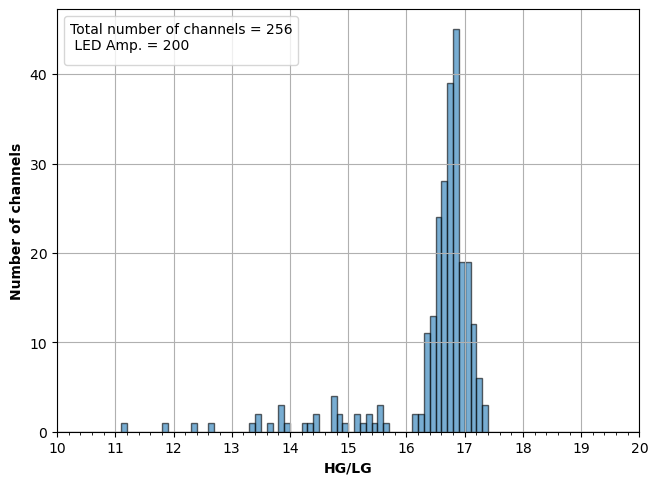

In [48]:
data_tmp = np.array(hg2lg)

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)

counts, bin_edges, patches = plt.hist(data_tmp, bins=100, range=(10,20), edgecolor='black', alpha=0.6)
centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.xlim(10,20)

major_ticks = np.arange(10, 21, 1)
ax.set_xticks(major_ticks)

minor_ticks = np.arange(10, 20.1, 0.2)
ax.set_xticks(minor_ticks, minor=True)

plt.xlabel("HG/LG", fontweight="bold")
plt.ylabel("Number of channels", fontweight="bold")
plt.grid(True)

plt.legend(title=f"Total number of channels = {len(data_tmp)}\n LED Amp. = 200", loc="best")
print(data_tmp.mean())

In [30]:
phos_calib.load_hg2lg(hg2lg)
phos_calib.fill_df_from_TH1(do_ped_sub=True, use_lg=True)

df_pos_corr = phos_calib.get_df_pos()
df_rms_corr = phos_calib.get_df_rms()

In [6]:
df_pos_corr

,30,100,150,200,250,300,310,320,330,340,350,360,370,380,390
x48_z30,84.747166,94.440178,119.731392,205.514672,394.137759,824.106818,959.038508,1128.311817,1343.367825,1612.000441,1958.109303,2414.733719,3034.972386,3911.47696,5214.699573
x48_z31,69.815949,76.831715,94.176375,149.363741,264.645817,511.334723,590.196882,685.217375,800.914074,933.526968,1123.252733,1352.306469,1651.708804,2057.923831,2621.167293
x48_z32,106.054883,117.871867,147.529935,270.722994,589.646042,1405.691932,1732.56891,2117.296002,2662.06517,3373.805256,4371.652164,5848.695257,8235.448144,12562.566393,0.0
x48_z33,91.960317,104.401374,130.641586,205.741512,351.485452,659.229545,758.01124,874.44914,1023.287525,1200.923487,1412.884374,1701.098496,2079.228599,2587.97357,3297.275375
x48_z34,43.271385,49.194175,58.837652,90.139938,150.93515,279.70653,319.638306,369.553651,428.279259,499.268006,590.215664,703.572205,850.618513,1021.395503,1275.410442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x63_z41,66.453823,72.624394,88.015764,141.708173,257.86705,514.900915,601.226483,703.645306,831.04,989.345799,1178.921958,1436.583474,1779.466699,2245.620282,2912.989902
x63_z42,79.500755,89.730583,110.067152,162.234977,258.834356,453.103659,512.866594,583.804996,670.080741,774.148134,908.891729,1068.637245,1271.853035,1534.142973,1878.173176
x63_z43,48.662509,54.06877,66.157767,104.283513,182.807515,350.420671,403.91504,467.73806,546.065926,642.033486,763.247774,909.013037,1109.172449,1376.540506,1746.873244
x63_z44,27.100453,29.988673,37.384304,67.233436,138.291091,322.063692,388.800072,470.370896,578.227205,717.365956,903.426033,1167.843427,1562.98223,2204.948869,3369.691643


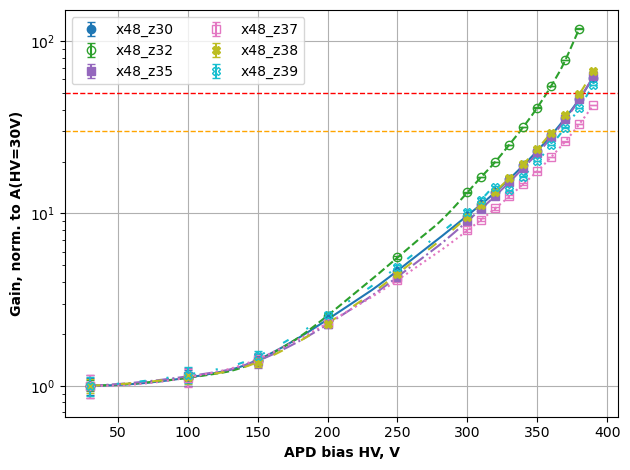

In [24]:
# plotting pos in ADC vs HV. for N random channels (with boxplots from a cell above)
# draft for the gain calibration

from scipy.interpolate import interp1d

calib_hv_per_csp = [np.zeros(32) for fec in range(0,8)]
Nchannels = 6
isGain = True
target_gain = 30
tot_ch = 0

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)
style_map = PHOSAnalyzer.get_style_map(n=Nchannels, gradient="tab10", vmin=0, vmax=1)

nplot = 0

for i, ich in enumerate(df_pos_corr.index):

    # if (i < Nchannels): # drawning only Nchannels for presentation

        mask = df_pos_corr.loc[ich].values > 0
        y    = np.array(df_pos_corr.loc[ich].values[mask])
        yerr = np.array(df_rms_corr.loc[ich].values[mask])
        x    = np.array(df_pos_corr.columns[mask])
        xfit = np.linspace(x[0], x[-1], 1000)

        # setting Gain at 1 for the lowest HV (assuming Gain=1 at HV=30V, y[0])
        if (isGain):
            yerr /= y[0]
            y /= y[0]

        f = interp1d(x, y, kind='quadratic')
        f_inverse = interp1d(y, x, kind='linear', bounds_error=False, fill_value="extrapolate")
        yfit = f(xfit)

        if (not isGain and i < Nchannels):
        
            ax.errorbar(x, y, yerr=2.95*yerr,
                            **style_map["markers"][i],
                            linestyle="none",
                            capsize=3,
                            color=style_map["colors"][i],
                            label=f"{ich}"
                        )
            
            plt.plot(xfit, yfit, linestyle=style_map["linestyles"][i], color=style_map["colors"][i])

        if (isGain):
            
            fec, csp = phos_calib.get_fec_csp(ich)
            hv = f_inverse(target_gain)
            calib_hv_per_csp[fec][csp] = int(hv)

            if (hv < 380 and nplot < 6):
                ax.errorbar(x, y, yerr=2.95*yerr,
                            **style_map["markers"][nplot],
                            linestyle="none",
                            capsize=3,
                            color=style_map["colors"][nplot],
                            label=f"{ich}"
                        )
                plt.plot(xfit, yfit, linestyle=style_map["linestyles"][nplot], color=style_map["colors"][nplot])
            
                nplot += 1


plt.xlabel("APD bias HV, V", fontweight="bold")
plt.ylabel("Peak position, ADC digits", fontweight="bold")

if (isGain):
    plt.ylabel("Gain, norm. to A(HV=30V)", fontweight="bold")
    plt.axhline(y=30, color='orange', linestyle='--', linewidth=1)
    plt.axhline(y=50, color='red', linestyle='--', linewidth=1)

plt.grid(True)
# plt.legend(title=r"fit func: $A\cdot\exp[B\cdot(x - x_0)] + C$", ncol=2)
plt.legend(ncol=2, loc="best")
plt.yscale("log")
plt.tight_layout()

# plt.savefig(f"figures/20251218_Gain_vs_HV_LED250_HG.png", dpi=500)

In [ ]:
SaveHV = False

import os
from itertools import product

os.makedirs("APDsettings", exist_ok=True)

modID = phos_calib.get_module()
sruID = phos_calib.sru

x_range = phos_calib.x_range
z_range = phos_calib.z_range
get_fec_csp = phos_calib.get_fec_csp
get_csp_id = phos_calib.get_csp_id

HV_MIN = 210.0
HV_MAX = 400.0
HV_RANGE = HV_MAX - HV_MIN
SCALE = 1024.0

file_handles = {}

if (SaveHV):
    try:
        for ix, iz in product(x_range, z_range):
            fec, csp = get_fec_csp(f"x{ix}_z{iz}")
            cspid = get_csp_id(csp)

            filename = f"APDsettings/APD_M{modID}-{sruID}_FEE{fec+2:02d}.dat"

            # Open file once per FEC
            if filename not in file_handles:
                file_handles[filename] = open(filename, "w")

            hv = calib_hv_per_csp[fec][csp]
            hv = max(hv, 210.0)
            hv = min(hv, 385.0)
            hvx = int((hv - HV_MIN) / HV_RANGE * SCALE)

            file_handles[filename].write(
                f"0x{cspid:x} 0x{hvx:03x}     # (x,z) = ({ix-1:2d},{iz-1:2d}), CSP = {csp:2d}, bias = {hv:.1f} V\n"
            )
    finally:
        for f in file_handles.values():
            f.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


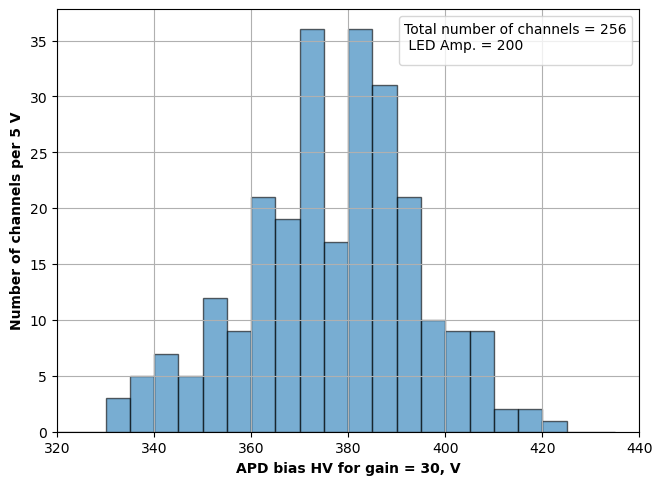

In [28]:
data_tmp = []
for ifec, fec in enumerate(calib_hv_per_csp):
    for icsp, hv in enumerate(fec):
        if (hv != 0):
            data_tmp.append(int(hv))

fig, ax = plt.subplots()
fig.subplots_adjust(top=0.95, bottom=0.07, left=0.07, right=0.98)

counts, bin_edges, patches = plt.hist(data_tmp, bins=range(320,440,5), edgecolor='black', alpha=0.6)
centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.xlim(320,440)
plt.xlabel("APD bias HV for gain = 30, V", fontweight="bold")
plt.ylabel("Number of channels per 5 V", fontweight="bold")
plt.grid(True)

plt.legend(title=f"Total number of channels = {len(data_tmp)}\n LED Amp. = 200", loc="best")